In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_excel("BRSM_Results Visualization.xlsx")
np.random.seed(42)

In [19]:
print(data)

    Group  No. of Mosquitoes
0    Beer                 27
1    Beer                 19
2    Beer                 20
3    Beer                 20
4    Beer                 23
5    Beer                 17
6    Beer                 21
7    Beer                 24
8    Beer                 31
9    Beer                 26
10   Beer                 28
11   Beer                 20
12   Beer                 27
13   Beer                 19
14   Beer                 25
15   Beer                 31
16   Beer                 24
17   Beer                 28
18   Beer                 24
19   Beer                 29
20   Beer                 21
21   Beer                 21
22   Beer                 18
23   Beer                 27
24   Beer                 20
25  Water                 21
26  Water                 19
27  Water                 13
28  Water                 22
29  Water                 15
30  Water                 22
31  Water                 15
32  Water                 22
33  Water     

#part 2a

[27 19 20 20 23 17 21 24 31 26 28 20 27 19 25 31 24 28 24 29 21 21 18 27
 20]
[21 19 13 22 15 22 15 22 20 12 24 24 21 19 18 16 23 20]


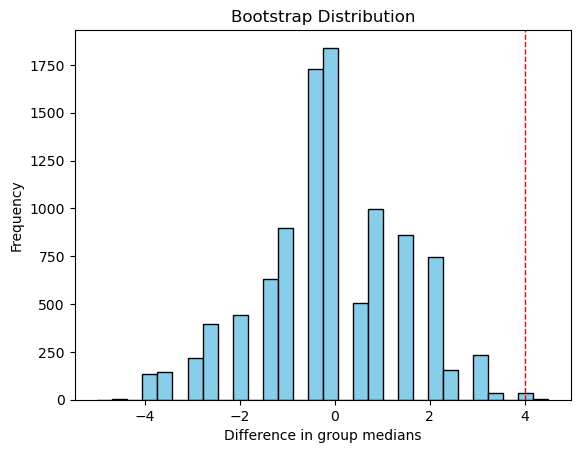

Observed Difference in Group Medians: 4.0
P-value: 0.0039


In [25]:



group_beer=data.loc[data["Group"] == "Beer", "No. of Mosquitoes"].values
print(group_beer)
group_water=data.loc[data["Group"] == "Water", "No. of Mosquitoes"].values
print(group_water)


# Observed difference between group medians
observed_diff = np.median(group_beer) - np.median(group_water)

# Combined data
combined_data = np.concatenate([group_beer, group_water])

# Number of iterations for permutation test
num_iterations = 10000

# Initialize array to store permuted differences
permuted_diffs = np.zeros(num_iterations)

# Permutation test
for i in range(num_iterations):
    # Shuffle the combined data
    np.random.shuffle(combined_data)
    # Split shuffled data into two groups
    permuted_group_beer = combined_data[:len(group_beer)]
    permuted_group_water = combined_data[len(group_beer):]
    # Calculate the difference between group medians for permuted data
    permuted_diff = np.median(permuted_group_beer) - np.median(permuted_group_water)
    permuted_diffs[i] = permuted_diff

# Calculate p-value
p_value = np.mean(permuted_diffs >= observed_diff)

# Plot histogram
plt.hist(permuted_diffs, bins=30, color='skyblue', edgecolor='black')
plt.axvline(observed_diff, color='red', linestyle='dashed', linewidth=1)
plt.xlabel('Difference in group medians')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution')
plt.show()

print("Observed Difference in Group Medians:", observed_diff)
print("P-value:", p_value)

#part 2b

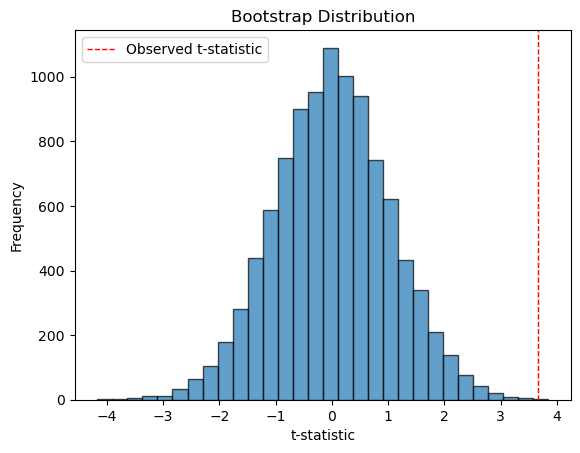

Observed t-statistic: 3.658244539721401
p-value: 0.0008


In [27]:
# Calculate the observed t-statistic
df = pd.read_excel("BRSM_Results Visualization.xlsx")
beer_df = df[df['Group'] == 'Beer']
water_df = df[df['Group'] == 'Water']
observed_mean_diff = beer_df['No. of Mosquitoes'].mean() - water_df['No. of Mosquitoes'].mean()
observed_std_dev = np.sqrt((beer_df['No. of Mosquitoes'].var() / len(beer_df)) + (water_df['No. of Mosquitoes'].var() / len(water_df)))
observed_t_statistic = observed_mean_diff / observed_std_dev

# Define a function to calculate the t-statistic
def t_statistic(group1, group2):
    mean_diff = group1.mean() - group2.mean()
    std_dev = np.sqrt((group1.var() / len(group1)) + (group2.var() / len(group2)))
    return mean_diff / std_dev

# Perform permutation test with 10,000 iterations
num_permutations = 10000
t_statistics = []
for _ in range(num_permutations):
    # Concatenate the data and shuffle
    combined_data = pd.concat([beer_df['No. of Mosquitoes'], water_df['No. of Mosquitoes']])
    combined_data = combined_data.sample(frac=1)  # Shuffle the data
    
    # Split the shuffled data into two groups
    shuffled_group1 = combined_data[:len(beer_df)]
    shuffled_group2 = combined_data[len(beer_df):]
    
    # Calculate the t-statistic for the shuffled groups
    t_stat = t_statistic(shuffled_group1, shuffled_group2)
    t_statistics.append(t_stat)

# Convert the list to a NumPy array
t_statistics = np.array(t_statistics)

# Calculate the p-value
p_value = np.mean(np.abs(t_statistics) >= np.abs(observed_t_statistic))

# Plot the histogram of the bootstrap distribution
plt.hist(t_statistics, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(observed_t_statistic, color='red', linestyle='dashed', linewidth=1, label='Observed t-statistic')
plt.xlabel('t-statistic')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution')
plt.legend()
plt.show()

print("Observed t-statistic:", observed_t_statistic)
print("p-value:", p_value)



#part c

In [29]:

p_value_two_tailed = np.mean(np.abs(permuted_diffs) >= np.abs(observed_diff))

print("Two-tailed P-value:", p_value_two_tailed)

Two-tailed P-value: 0.0178


#Q3

In [44]:
import pandas as pd
import numpy as np

# Read the dataset
file_path = "data.xlsx"  # Update with the actual path to the dataset
df = pd.read_excel(file_path)
# print(df)
# c=df.columns.tolist()
# print(c)
# Calculate observed correlation
observed_correlation = df['IQ'].corr(df['Placement \nTESTSCORE'])

# Define permutation test function
def permutation_test(data1, data2, num_permutations):
    combined_data = np.concatenate((data1, data2))
    observed_difference = np.abs(data1.mean() - data2.mean())
    num_samples = len(data1)
    permutations = np.zeros(num_permutations)
    
    for i in range(num_permutations):
        np.random.shuffle(combined_data)
        permuted_data1 = combined_data[:num_samples]
        permuted_data2 = combined_data[num_samples:]
        permutation_difference = np.abs(permuted_data1.mean() - permuted_data2.mean())
        permutations[i] = permutation_difference
    
    p_value = np.mean(permutations >= observed_difference)
    return p_value

# Perform permutation test with 10,000 iterations
num_permutations = 10000
p_value = permutation_test(df['IQ'], df['Placement \nTESTSCORE'], num_permutations)

# Print the observed correlation and significance
print("Observed correlation:", observed_correlation)
print("p-value:", p_value)

# Decide whether to reject or accept the null hypothesis
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is sufficient evidence to conclude a significant correlation between IQ and test scores.")
else:
    print("Accept the null hypothesis. There is no sufficient evidence to conclude a significant correlation between IQ and test scores.")

Observed correlation: 0.4931479069133802
p-value: 0.0
Reject the null hypothesis. There is sufficient evidence to conclude a significant correlation between IQ and test scores.
